# Histogram of Bird Species

In [1]:
%load_ext autoreload
%autoreload 2

### testing Spark setup

In [2]:
# let's check that the initial data from murilo is theres
! gcloud storage ls gs://dsgt-clef-birdclef-2024/data/raw/birdclef-2023 | head

gs://dsgt-clef-birdclef-2024/data/raw/birdclef-2023/eBird_Taxonomy_v2021.csv
gs://dsgt-clef-birdclef-2024/data/raw/birdclef-2023/sample_submission.csv
gs://dsgt-clef-birdclef-2024/data/raw/birdclef-2023/train_metadata.csv
gs://dsgt-clef-birdclef-2024/data/raw/birdclef-2023/test_soundscapes/
gs://dsgt-clef-birdclef-2024/data/raw/birdclef-2023/train_audio/


In [21]:
from birdclef.utils import get_spark
from IPython.display import Image, display

spark = get_spark()
display(spark)


def get_dataframe_from_gcs(year: str):
    # read straight from the bucket
    df = spark.read.csv(
        f"gs://dsgt-clef-birdclef-2024/data/raw/birdclef-{year}/train_metadata.csv"
    )
    return df


df_2022 = get_dataframe_from_gcs(year=2022)
df_2023 = get_dataframe_from_gcs(year=2023)
df_2023.printSchema()
df_2023.show(vertical=True, n=1, truncate=100)

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)

-RECORD 0----------------
 _c0  | primary_label    
 _c1  | secondary_labels 
 _c2  | type             
 _c3  | latitude         
 _c4  | longitude        
 _c5  | scientific_name  
 _c6  | common_name      
 _c7  | author           
 _c8  | license          
 _c9  | rating           
 _c10 | url              
 _c11 | filename         
only showing top 1 row



In [22]:
df_2023.show(n=5)

+-------------+----------------+--------+--------+---------+------------------+--------------------+-------------+--------------------+------+--------------------+--------------------+
|          _c0|             _c1|     _c2|     _c3|      _c4|               _c5|                 _c6|          _c7|                 _c8|   _c9|                _c10|                _c11|
+-------------+----------------+--------+--------+---------+------------------+--------------------+-------------+--------------------+------+--------------------+--------------------+
|primary_label|secondary_labels|    type|latitude|longitude|   scientific_name|         common_name|       author|             license|rating|                 url|            filename|
|      abethr1|              []|['song']|  4.3906|  38.2788|Turdus tephronotus|African Bare-eyed...|Rolf A. de By|Creative Commons ...|   4.0|https://www.xeno-...|abethr1/XC128013.ogg|
|      abethr1|              []|['call']| -2.9524|  38.2921|Turdus tephrono

### Histogram of bird species

In [26]:
from matplotlib import pyplot as plt


def get_data_plotting(df):
    # Group by species and count
    species_counts = df.groupBy("_c5").count().orderBy("count", ascending=False)

    # Convert to Pandas DataFrame for plotting
    species_df = species_counts.toPandas()

    # Get the top and bottom 5 species
    top_5 = species_df.head(5)

    return species_df, top_5


# Get plotting data
species_2022, top_2022 = get_data_plotting(df=df_2022)
species_2023, top_2023 = get_data_plotting(df=df_2023)

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:111: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 4.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)
/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:111: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 4.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


In [31]:
def plot_species_histogram(species_df, top_5, year):
    # Plotting
    plt.figure(figsize=(10, 6), dpi=100)

    # Plot all species
    plt.bar(species_df["_c5"], species_df["count"], color="blue")

    # Highlight the top 5 species in different colors
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
    for i, row in top_5.iterrows():
        plt.bar(row["_c5"], row["count"], color=colors[i], label=row["_c5"])

    plt.xlabel("Species")
    plt.ylabel("Count")
    plt.title(
        f"BirdCLEF {str(year)} Histogram of Bird Species (Top 5 Highlighted)",
        weight="bold",
        fontsize=14,
    )
    plt.xticks([])
    plt.legend(title="Top 5 Species")
    plt.tight_layout()
    plt.show()

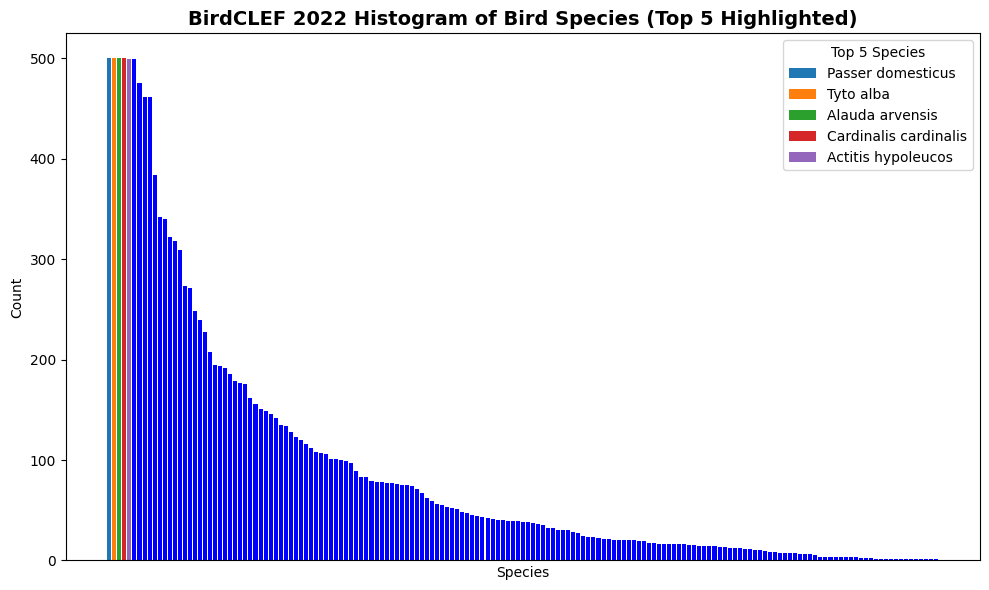

In [32]:
plot_species_histogram(species_df=species_2022, top_5=top_2022, year=2022)

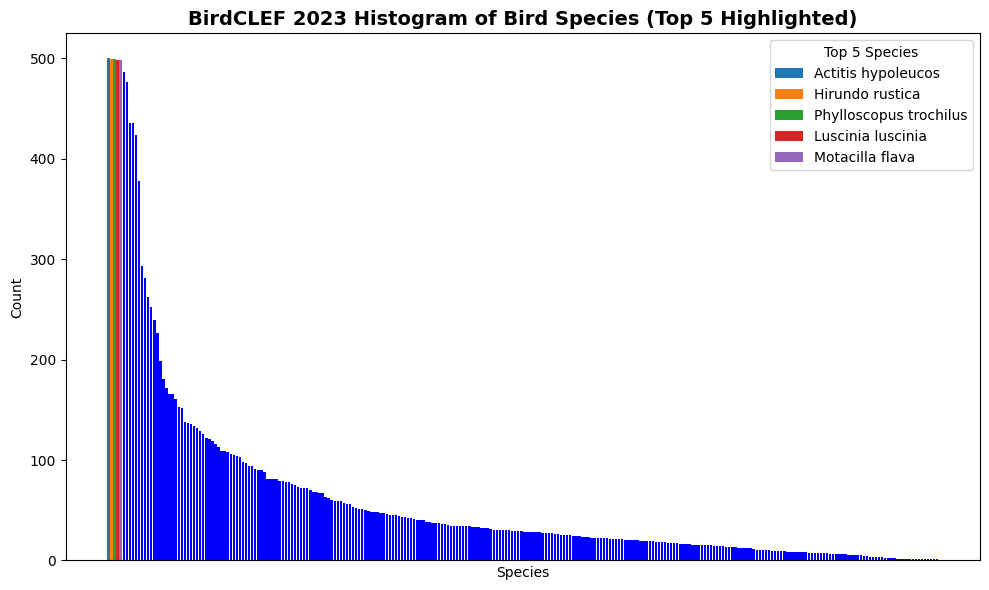

In [33]:
plot_species_histogram(species_df=species_2023, top_5=top_2023, year=2023)

In [35]:
# Number of distinct bird species
def count_unique_species(df):
    unique_species_count = df.select("_c5").distinct().count()
    return unique_species_count


unique_count_2022 = count_unique_species(df_2022)
unique_count_2023 = count_unique_species(df_2023)
print(f"Count of unique bird species in 2022: {unique_count_2022}")
print(f"Count of unique bird species in 2023: {unique_count_2023}")

Count of unique bird species in 2022: 165
Count of unique bird species in 2023: 272
